# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент федерального оператора сотовой связи хочет понять, какой тариф приносит больше денег. Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов.   
В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#читаем файлы
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
pd.set_option('display.float_format', '{:.1f}'.format)

#### Таблица df_tariffs

In [3]:
df_tariffs.info()
df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Таблица df_users

In [4]:
df_users.info()
display(df_users.head())
df_users.describe().loc[['min', 'max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
min,1000.0,18.0
max,1499.0,75.0


#### Таблица df_calls

In [5]:
df_calls.info()
display(df_calls.head())
df_calls.describe().loc[['min', 'max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.9,1000
3,1000_3,2018-09-21,13.8,1000
4,1000_4,2018-12-15,5.2,1000


,duration,user_id
min,0.0,1000.0
max,38.0,1499.0


#### Таблица df_messages

In [6]:
df_messages.info()
display(df_messages.head())
df_messages.describe().loc[['min', 'max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
min,1000.0
max,1499.0


#### Таблица df_internet

In [7]:
df_internet.info()
display(df_internet.head())
df_internet.describe().loc[['min', 'max']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1052.8,2018-09-07,1000
2,1000_2,1197.3,2018-06-25,1000
3,1000_3,550.3,2018-08-22,1000
4,1000_4,302.6,2018-09-24,1000


,mb_used,user_id
min,0.0,1000.0
max,1724.8,1499.0


### Вывод

В данных представлены несколько таблиц с информацией о пользователях и тарифных планах; данные о звонках, сообщениях и интернет-трафике. У некоторых данных неверный формат и есть пропущенные значения, исправим на следующем этапе

## Обработка данных

### Приведение данных к нужным типам

Заменим во всех колонках с датами тип данных с object на datetime:

In [8]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

### Обработка ошибок и пропусков

#### Проверка на дубликаты:

In [9]:
df_tariffs.duplicated().sum()

0

In [10]:
df_users.duplicated().sum()

0

In [11]:
df_calls.duplicated().sum()

0

In [12]:
df_messages.duplicated().sum()

0

In [13]:
df_internet.duplicated().sum()

0

#### df_users cтолбец 'churn_date'

Содержит пустые значения, но в исследовании этот столбец использован не будет - оставим пропуски как есть

#### df_calls столбец 'duration'

Оператор всегда округляет секунды до минут; каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Округлим значения по правилам оператора и приведем в целочисленный тип:

In [14]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

In [15]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


#### df_internet столбец 'Unnamed: 0'

Бесполезный столбец, повторяющий индексы строк, удалим его:  

#df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

### Расчет значений для каждого пользователя

#### Количество звонков и израсходованных минут по месяцам:

In [17]:
#добавляем столбец month
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


In [18]:
#cгруппируем данные по user_id и month
df_calls_pt = df_calls.pivot_table(index=['user_id', 'month'], aggfunc={'duration':sum, 'id':'count'}) 
df_calls_pt.columns = ['calls_duration', 'calls_count']
df_calls_pt.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   calls_duration  3174 non-null   int64
 1   calls_count     3174 non-null   int64
dtypes: int64(2)
memory usage: 62.9 KB


#### Количество отправленных сообщений по месяцам:

In [19]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages_pt = df_messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'})
df_messages_pt.columns = ['messages']
#df_messages_pt

#### Объем израсходованного интернет-трафика по месяцам:

In [20]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet_pt = df_internet.pivot_table(index=['user_id', 'month'], aggfunc={'mb_used':sum})
df_internet_pt.columns = ['traffic']
#df_internet_pt.info()

#### Помесячная выручка с каждого пользователя:

In [21]:
#объединяем сводные таблицы по индексам и сбрасываем индекс month для последующего объединения с df_users
df_cmi_pt = df_internet_pt.join([df_calls_pt, df_messages_pt], how='outer').reset_index(level='month')
df_cmi_pt

,month,traffic,calls_duration,calls_count,messages
user_id,,,,,
1000,5,2253.5,159.0,22.0,22.0
1000,6,23233.8,172.0,43.0,60.0
1000,7,14003.6,340.0,47.0,75.0
1000,8,14055.9,408.0,52.0,81.0
1000,9,14568.9,466.0,58.0,57.0
...,...,...,...,...,...
1498,10,20579.4,247.0,41.0,42.0
1499,9,1845.8,70.0,9.0,11.0
1499,10,17788.5,449.0,68.0,48.0


In [22]:
# проверка
df_cmi_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1000 to 1499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           3214 non-null   int64  
 1   traffic         3203 non-null   float64
 2   calls_duration  3174 non-null   float64
 3   calls_count     3174 non-null   float64
 4   messages        2717 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.7 KB


In [23]:
#объединяем с таблицей users
df_overall_pt = df_users.join(df_cmi_pt, on='user_id')
df_overall_pt.info()
#df_overall_pt.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 499
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   age             3216 non-null   int64         
 2   churn_date      189 non-null    datetime64[ns]
 3   city            3216 non-null   object        
 4   first_name      3216 non-null   object        
 5   last_name       3216 non-null   object        
 6   reg_date        3216 non-null   datetime64[ns]
 7   tariff          3216 non-null   object        
 8   month           3214 non-null   float64       
 9   traffic         3203 non-null   float64       
 10  calls_duration  3174 non-null   float64       
 11  calls_count     3174 non-null   float64       
 12  messages        2717 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


In [24]:
df_overall_pt['traffic'] = np.ceil(df_overall_pt['traffic'] / 1024)

In [25]:
#удаляем ненужные для расчета выручки столбцы
df_overall_pt.drop(columns=['churn_date', 'first_name', 'last_name', 'reg_date', 'calls_count'], inplace=True)
df_overall_pt.sample(3)

,user_id,age,city,tariff,month,traffic,calls_duration,messages
27,1027,62,Петрозаводск,smart,9.0,19.0,388.0,10.0
172,1172,40,Санкт-Петербург,smart,7.0,29.0,401.0,5.0
181,1181,37,Омск,smart,12.0,28.0,351.0,82.0


In [26]:
#проверяем на пропуски
df_overall_pt.isna().sum()

user_id             0
age                 0
city                0
tariff              0
month               2
traffic            13
calls_duration     42
messages          499
dtype: int64

In [27]:
# проверка
df_overall_pt[df_overall_pt['calls_duration'].isna()]

,user_id,age,city,tariff,month,traffic,calls_duration,messages
91,1091,36,Набережные Челны,ultra,5.0,11.0,NaN,30.0
91,1091,36,Набережные Челны,ultra,6.0,10.0,NaN,30.0
91,1091,36,Набережные Челны,ultra,7.0,17.0,NaN,35.0
91,1091,36,Набережные Челны,ultra,8.0,13.0,NaN,31.0
91,1091,36,Набережные Челны,ultra,9.0,17.0,NaN,32.0
91,1091,36,Набережные Челны,ultra,10.0,16.0,NaN,44.0
91,1091,36,Набережные Челны,ultra,11.0,12.0,NaN,28.0
91,1091,36,Набережные Челны,ultra,12.0,13.0,NaN,42.0
106,1106,67,Калуга,ultra,4.0,3.0,NaN,9.0
106,1106,67,Калуга,ultra,5.0,17.0,NaN,28.0


In [28]:
df_users[(df_users['user_id']==1128) | (df_users['user_id']==1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Есть 2 пропуска в столбце month; это значит, что 2 клиента в исследуемом нами периоде не воспользовались телефоном вообще - удалим их. Остальные пропуски заменим на '0':

In [29]:
df_overall_pt.dropna(subset=['month'], inplace=True)
df_overall_pt.fillna(0, inplace=True)

Создадим функцию подсчета выручки в месяц для каждого клиента:

In [30]:
def revenue_month(data):
    tariff = data['tariff']
    traffic = data['traffic']
    duration = data['calls_duration']
    messages = data['messages']
   
    if tariff == 'smart':
        ext_duration = (duration - df_tariffs.loc[0, 'minutes_included']) if (duration - df_tariffs.loc[0, 'minutes_included'])>=0 else 0
#для оплаты дополнительного траффика переведем мегабайты в гигабайты и округлим "вверх"        
        ext_traffic = (traffic - (df_tariffs.loc[0, 'mb_per_month_included'])/1024) if (traffic - (df_tariffs.loc[0, 'mb_per_month_included'])/1024)>=0 else 0
        ext_messages = (messages - df_tariffs.loc[0, 'messages_included']) if (messages - df_tariffs.loc[0, 'messages_included'])>=0 else 0
        return (df_tariffs.loc[0, 'rub_per_minute'] * ext_duration +
                df_tariffs.loc[0, 'rub_per_gb'] * ext_traffic +      
                df_tariffs.loc[0, 'rub_per_message'] * ext_messages + 
                df_tariffs.loc[0, 'rub_monthly_fee']
               )
    if tariff == 'ultra':
        ext_duration = (duration - df_tariffs.loc[1, 'minutes_included']) if (duration - df_tariffs.loc[1, 'minutes_included'])>=0 else 0       
        ext_traffic = (traffic - (df_tariffs.loc[1, 'mb_per_month_included'])/1024) if (traffic - (df_tariffs.loc[1, 'mb_per_month_included'])/1024)>=0 else 0
        ext_messages = (messages - df_tariffs.loc[1, 'messages_included']) if (messages - df_tariffs.loc[1, 'messages_included'])>=0 else 0
        return (df_tariffs.loc[1, 'rub_per_minute'] * ext_duration +
                df_tariffs.loc[1, 'rub_per_gb'] * ext_traffic +      
                df_tariffs.loc[1, 'rub_per_message'] * ext_messages + 
                df_tariffs.loc[1, 'rub_monthly_fee']
               )

In [31]:
#создадим столбец 'revenue' применив функцию revenue_month к каждой строке df_overall_pt
df_overall_pt['revenue'] = df_overall_pt.apply(revenue_month, axis=1)
df_overall_pt.sample(7)

,user_id,age,city,tariff,month,traffic,calls_duration,messages,revenue
323,1323,67,Челябинск,smart,8.0,17.0,481.0,59.0,977.0
486,1486,35,Нижний Новгород,smart,11.0,36.0,764.0,96.0,5680.0
311,1311,33,Тверь,smart,10.0,15.0,316.0,67.0,601.0
389,1389,29,Москва,smart,10.0,19.0,329.0,3.0,1350.0
225,1225,71,Оренбург,ultra,12.0,19.0,436.0,0.0,1950.0
396,1396,23,Пенза,ultra,8.0,16.0,521.0,90.0,1950.0
440,1440,51,Москва,ultra,5.0,4.0,52.0,17.0,1950.0


In [32]:
# проверка
df_overall_pt['revenue'].sum()

4914451.0

### Вывод

Там где было необходимо, изменили тип данных; проверили данные на пропуски и ошибки - исправили их. Подсчитали месячное количество минут, сообщений, мегабайт и общий счет для каждого клиента

## Анализ данных

#### Подсчет среднего количества, медианы, стандартного отклонения и дисперсии

In [33]:
df_overall_pt.pivot_table(index=['tariff'], values=['calls_duration', 'messages', 'traffic'], 
                                 aggfunc={'calls_duration':['median','mean','std','var'], 
                                          'messages':['median','mean','std','var'],
                                          'traffic':['median','mean','std','var']})                                

calls_duration                       messages                     \
                 mean median   std      var     mean median  std    var   
tariff                                                                    
smart           417.9  422.0 190.3  36219.3     33.4   28.0 28.2  796.8   
ultra           526.6  518.0 317.6 100873.6     49.4   38.0 47.8 2285.3   

       traffic                  
          mean median std  var  
tariff                          
smart     16.3   17.0 5.7 33.0  
ultra     19.5   19.0 9.9 97.1

#### Анализ поведения пользователей в зависимости от возраста

In [34]:
df_overall_pt.loc[df_overall_pt['age']!=0, 'age_cat'] = 'молодой'
df_overall_pt.loc[df_overall_pt['age']>25, 'age_cat'] = 'средний'
df_overall_pt.loc[df_overall_pt['age']>50, 'age_cat'] = 'старший'
df_overall_pt.pivot_table(index=['tariff','age_cat'], values=['calls_duration', 'messages', 'traffic'], 
                                 aggfunc={'calls_duration':['median'], 
                                          'messages':['median'],
                                          'traffic':['median']})

calls_duration messages traffic
                       median   median  median
tariff age_cat                                
smart  молодой          401.0     21.0    17.0
       средний          410.0     27.0    16.0
       старший          446.5     31.0    17.0
ultra  молодой          378.0     55.0    17.0
       средний          531.0     29.0    19.0
       старший          531.0     42.0    20.0

#### Гистограмма использованных минут

In [35]:
#создаем таблицу для гистограмм
#hist_pt = df_overall_pt.pivot_table(index=['user_id', 'tariff'], values=['calls_duration', 'messages', 'traffic'])
hist_pt = df_overall_pt
smart = hist_pt.query('(tariff == "smart")')
ultra = hist_pt.query('(tariff == "ultra")')

In [36]:
# check
#hist_pt = df_overall_pt.pivot_table(index=['user_id', 'tariff'], values=['calls_duration', 'messages', 'traffic'])
#hist_pt.info()

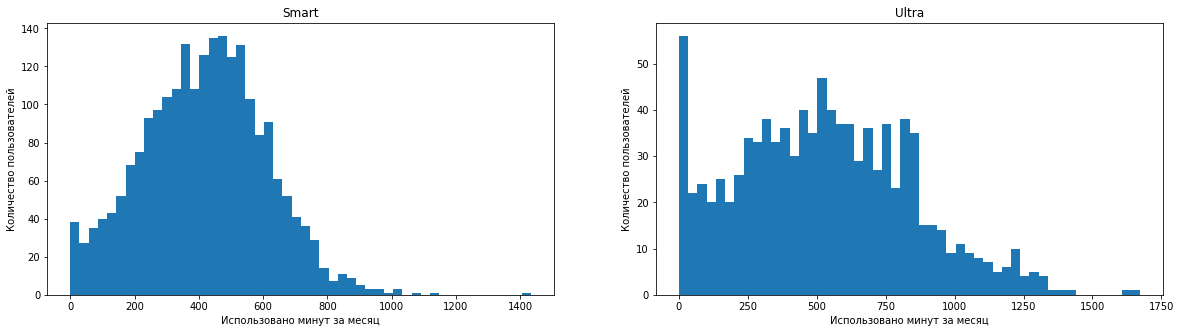

In [37]:
fig, axs = plt.subplots(1,2)
smart['calls_duration'].plot(bins=50, kind='hist', figsize=(20, 5), title="Smart", ax=axs[0])
axs[0].set(xlabel='Использовано минут за месяц', ylabel='Количество пользователей')
ultra['calls_duration'].plot(bins=50, kind='hist', figsize=(20, 5), title="Ultra", ax=axs[1])
axs[1].set(xlabel='Использовано минут за месяц', ylabel='Количество пользователей')
plt.show()

Нормальное распределение; Медиана на smart - 422 мин, для ultra - 520 мин; пользователи тарифа ultra никогда не превышали лимит включенных в тариф минут, тогда как клиенты с тарифом smart выходили за рамки в ~30% случаях

#### Гистограмма сообщений

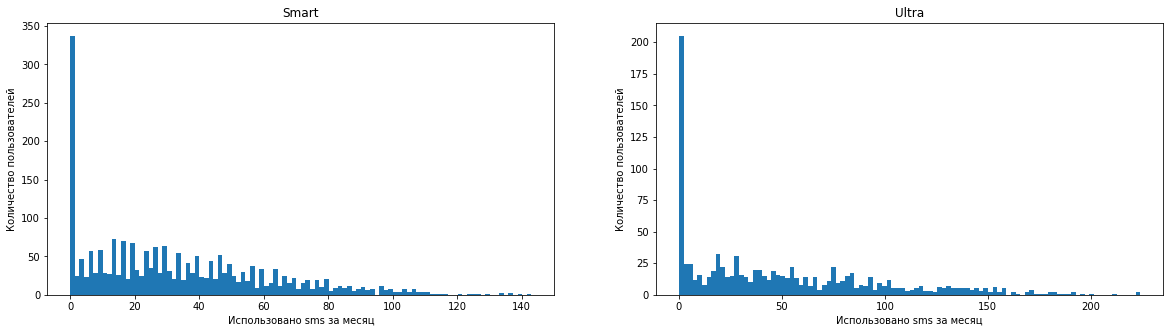

In [38]:
fig, axs = plt.subplots(1,2)
smart['messages'].plot(bins=100, kind='hist', figsize=(20, 5), title="Smart", ax=axs[0])
axs[0].set(xlabel='Использовано sms за месяц', ylabel='Количество пользователей')
ultra['messages'].plot(bins=100, kind='hist', figsize=(20, 5), title="Ultra", ax=axs[1])
axs[1].set(xlabel='Использовано sms за месяц', ylabel='Количество пользователей')
plt.show()

Часть пользователей вообще не пользуется текстовыми сообщениями на обоих тарифах; медиана для smart-a - 28, для ultra - 38; на smart-е пользователи превышают лимит примерно в ~25% случаях, а вот на ultre никогда не отправляли даже 300 sms-ок  за месяц при лимите в 1000

#### Гистограмма интернет траффика

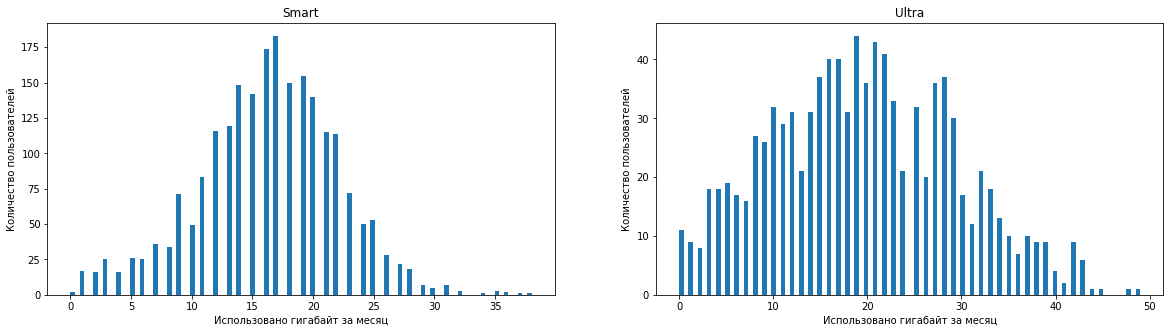

In [39]:
fig, axs = plt.subplots(1,2)
smart['traffic'].plot(bins=100, kind='hist', figsize=(20, 5), title="Smart", ax=axs[0])
axs[0].set(xlabel='Использовано гигабайт за месяц', ylabel='Количество пользователей')
ultra['traffic'].plot(bins=100, kind='hist', figsize=(20, 5), title="Ultra", ax=axs[1])
axs[1].set(xlabel='Использовано гигабайт за месяц', ylabel='Количество пользователей')
plt.show()

Нормальное распределение; медиана smarta-a - 17 Gb, у ultra - 19 Gb; превышение лимита случается на обоих тарифах, причем на smart-е это больше половины пользователей в месяц

### Вывод

"Безлимитный" тариф smart не такой уж и безлимитный, и уж точно не 'смарт' - больше половины пользователей этого тарифа вынуждены доплачивать каждый месяц за услуги связи; клиенты тарифа ultra платят больше, но о лимитах в разговорах и сообщениях могут не думать вообще, и только иногда им не хватаем интернет траффика

## Проверка гипотез

### Cредняя выручка пользователей тарифов "Ultra"  и  "Smart" 

Сформулируем нулевую и альтернативную гипотезы:  
H0 - средняя выручка пользователей тарифов smart и ultra равны  
H1 - средние выручки пользователей тарифов smart и ultra различаются  

Для проверки гипотезы применим метод scipy.stats.ttest_ind:

In [40]:
smart_tt = df_overall_pt.query('tariff == "smart"')['revenue']
ultra_tt = df_overall_pt.query('tariff == "ultra"')['revenue']
df_overall_pt.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,1023.0
ultra,1950.0


In [41]:
#общая выручка за год для каждого тарифа
df_overall_pt.pivot_table(index='tariff', values='revenue', aggfunc='sum')

,revenue
tariff,
smart,2875351.0
ultra,2039100.0


In [42]:
#уровень значимости
alpha = .01
#дисперсии различаются, поэтому 'equal_var=False'
results = st.ttest_ind(smart_tt, ultra_tt, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


### Cредняя выручка пользователей Москвы и из других регионов

Сформулируем нулевую и альтернативную гипотезы:  
H0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов  
H1 - средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов 

In [43]:
df_overall_pt.loc[df_overall_pt['city']!='Москва', 'region'] = 'Другой регион'
df_overall_pt.loc[df_overall_pt['city']=='Москва', 'region'] = 'Москва'
df_overall_pt.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1583.0
Москва,1750.0


In [44]:
#общая выручка за год для Москвы и регионов
df_overall_pt.pivot_table(index='region', values='revenue', aggfunc='sum')

,revenue
region,
Другой регион,3969409.0
Москва,945042.0


In [45]:
moscow_tt = df_overall_pt.query('city == "Москва"')['revenue']
region_tt = df_overall_pt.query('city != "Москва"')['revenue']
alpha = .01
results = st.ttest_ind(moscow_tt, region_tt, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### Вывод

Средняя выручка пользователей тарифов smart и ultra значимо не отличаются друг от друга; клиенты оператора в регионах платят в среднем как и жители столицы 

## Общий вывод

В результате проведенного статистического анализа - выручка от тарифа ultra больше, чем от тарифа smart: в среднем 'Мегалайн' от одного клиента в месяц получает 1950 и 1023 рублей соответственно  
В результате проведенного статистического анализа - выручка от пользователей в Москве почти не отличается от выручки в регионах: разница 167 рублей, статистически незначима  
Общая выручка от тарифа smart - 2875351 руб., ultra - 2039100 руб. Москва ппринесла выручки 945042 руб., остальные регионы 3969409 руб.
Пользователям smart-а не хватает "пакета" в рамках тарифного плана - кроме абонентской платы клиенты 'Мегалайна' в среднем доплачивают еще 473 рубля ежемесячно, т.е. почти столько же сколько стоит тарифный план(550 руб)   
Пользователи ultra не используют тарифный "пакет" в полном объеме, в минутах и sms он излишне избыточен  
Анализ поведения пользователей в зависимости от возраста ("молодой" "средний" "старший": 0-25 26-50 51-~ лет): чем старше человек тем больше он говорит по телефону, на обоих тарифах, медиана для smart-a: 401-410-447 мин. и 378-531-531 мин. для ultra; в sms-ках та же динамика в тарифе smart: 21-27-31, а вот в ultr-е другая 55-29-42; интернет трафик на smart-е у всех возрастов примерно одинаковая медиана 16-17 Gb, а на ultr-е увеличивается с возрастом 17-19-20 Gb. В общем - с возрастом увеличивается потребление всех видов связи